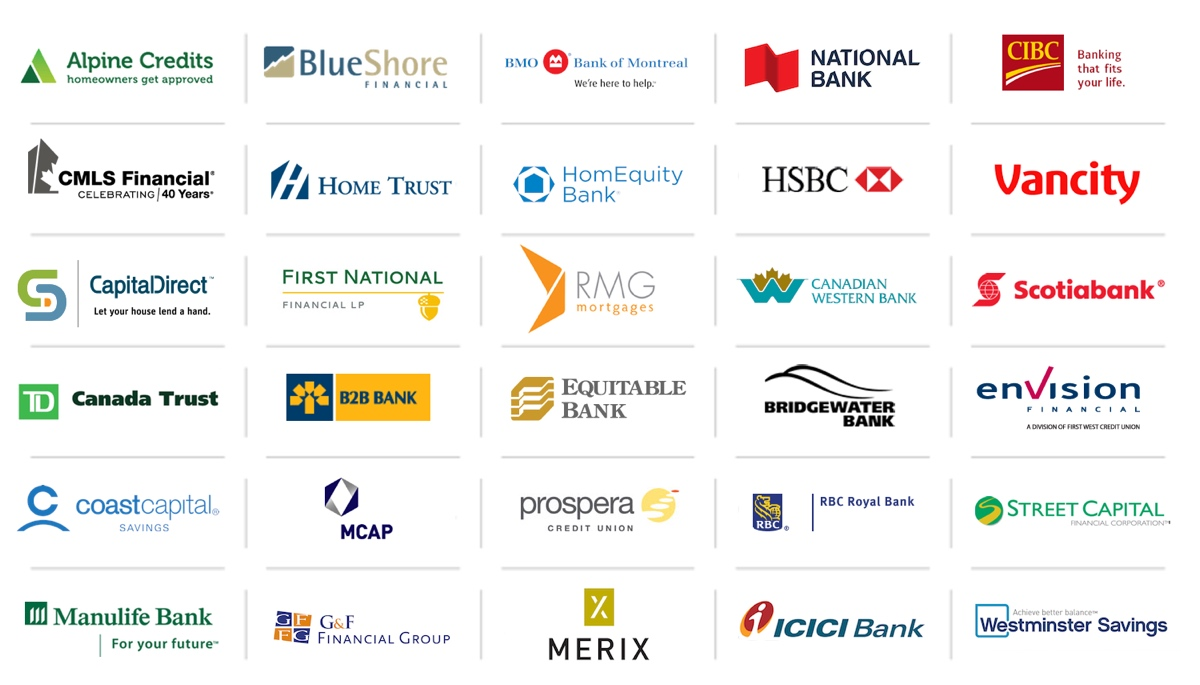

# 📈 Canadian Banks Stocks Data Project

In this data project, I conducted an exploratory analysis of stock prices, focusing on bank stocks, and tracked their progress throughout the Covid-19 pandemic. This project aimed to gain insights into the performance of these banks during a challenging period.

## 📋 Project Description:

Here's a quick rundown of the project:

1️⃣  Importing Required Packages: began by importing necessary Python packages, including Pandas DataReader, NumPy, Seaborn, Matplotlib, Plotly, Cufflinks, and more. These packages are essential for data analysis and visualization.

2️⃣ Importing Financial Stock Data from Yahoo Finance: I retrieved stock information for nine Canadian banks using Pandas DataReader, spanning from January 1, 2014, to January 1, 2023. The data includes daily stock prices, such as Open, High, Low, Close, and Volume.

3️⃣ Concatenating Bank Data: to facilitate analysis, I concatenated all bank dataframes into a single dataframe. This consolidation enables easy access to data from all banks using indexing.

4️⃣ Exploratory Analysis: I performed exploratory data analysis, including calculating the maximum and minimum stock prices, standard deviations, etc. 

5️⃣ In-Depth Analysis of a Stock (Royal Bank of Canada) for 2020: Focusing on the Royal Bank of Canada (RY), I analyzed its stock performance in 2020. A candlestick chart was used to visualize the stock's open, high, low, and close prices. Moving averages (SMA) and Bollinger Bands were plotted to analyze the stock's trends and volatility during this period.

## 🔍 Project Findings:

1️⃣ Stock Price Fluctuations: The stock prices of the nine Canadian banks we analyzed exhibited significant fluctuations during the pandemic. While some banks experienced substantial declines, others showed resilience.

2️⃣  Maximum and Minimum Prices: We found that the highest closing price of these bank stocks during the analysis period ranged from (VB: 16.540001) to (BMO: 153.720001). Conversely, the lowest closing price during the same period ranged from (VB: 4.070000) to (RY: 65.000000).

3️⃣ Daily Returns: Daily returns were calculated for each bank's stock. These returns represent the percentage change in closing prices from one day to the next. Notably, some banks exhibited more volatile returns than others.

4️⃣ Risk Assessment: The standard deviation of returns was used to assess the risk associated with each bank's stock. We found that Bank (TSE:EQB.TO) had the highest standard deviation, indicating higher volatility, while (TSE:RY.TO) had the lowest.

5️⃣ Correlation Analysis: We examined the correlation between the closing prices of these bank stocks. The correlation heatmap revealed varying degrees of correlation between different bank pairs, suggesting that they respond differently to market conditions.

## 💡 Recommendations:

1️⃣ Diversification: Investors should consider diversifying their portfolios across different banks to manage risk effectively.

2️⃣ Smart Investing: Careful attention should be paid to bank stocks during times of economic uncertainty, as they may exhibit increased volatility.

###  Step 1: Import required packages

In [1]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [2]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import cufflinks as cf
import datetime

sns.set_style('whitegrid')
%matplotlib inline
cf.go_offline()

#To import using yahoo finance
import yfinance as yf
yf.pdr_override()

### Step 2: Import finance Data

The stock information for the 9 Canadian banks below are gotten using Pandas datareader:

* Bank Of Nova Scotia (ScotiaBank)          - Ticker (TSE:BNS.TO)
* Bank of Montreal (BMO)                    - Ticker (TSE:BMO.TO)
* Canadian Imperial Bank of Commerce (CIBC) - Ticker (TSE:CM.TO)
* Canadian Western Bank (CWB)               - Ticker (TSE:CWB.TO)     
* Equitable Group (EQ Bank)                 - Ticker (TSE:EQB.TO)   
* Laurentian Bank of Canada (LB)            - Ticker (TSE:LB.TO) 
* National Bank of Canada (NA)              - Ticker (TSE:NA.TO)  
* Toronto-Dominion Bank (TD Bank)           - Ticker (TSE:TD.TO)
* VersaBank (VB)                            - Ticker(TSE:VBNK.TO)
* Royal Bank of Canada (RBC)                - Ticker (TSE:RY.TO)

** TICKER.TO WAS USED BE USING CAD INSTEAD OF USD FOR CONSISTENCY ** 

In [3]:
start = datetime.datetime(2014, 1, 1)
end = datetime.datetime(2023, 1, 1)

In [4]:
# Bank Of Nova Scotia
BNS = data.get_data_yahoo('BNS.TO', start, end)

# Bank of Montreal
BMO = data.get_data_yahoo('BMO.TO', start, end)
    
# Canadian Imperial Bank of Commerce
CM = data.get_data_yahoo('CM.TO', start, end)
    
# Canadian Western Bank
CWB = data.get_data_yahoo('CWB.TO', start, end)
    
# Equitable Group 
EQB = data.get_data_yahoo('EQB.TO', start, end)
    
# Laurentian Bank of Canada
LB = data.get_data_yahoo('LB.TO', start, end)

# National Bank of Canada
NA = data.get_data_yahoo('NA.TO', start, end)

# Toronto-Dominion Bank
TD = data.get_data_yahoo('TD.TO', start, end)

# VersaBank
VB = data.get_data_yahoo('VBNK.TO', start, end)

# Royal Bank of Canada
RY = data.get_data_yahoo('RY.TO', start, end)

RY.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,71.300003,71.639999,70.779999,71.589996,48.886719,1576100
2014-01-03,71.370003,71.459999,71.110001,71.389999,48.750172,1243400
2014-01-06,71.449997,71.500000,70.610001,70.699997,48.278969,2737700
2014-01-07,71.000000,71.440002,70.970001,70.970001,48.463345,1374100
2014-01-08,70.959999,71.180000,70.669998,71.000000,48.483837,1293700


### Step 3: Concatenating all bank dfs to a single df

This step is for easy of use when conducting analysis. Instead of calling all 9 dfs, the main one can be used using indexing.

In [5]:
tickers = ['BNS','BMO','CM','CWB','EQB','LB','NA','TD','VB','RY']

In [6]:
bank_stocks = pd.concat([BNS,BMO,CM,CWB,EQB,LB,NA,TD,VB,RY],axis=1,keys=tickers)
bank_stocks.columns.names = ['Bank Ticker','Stock Info']
bank_stocks.head()

Bank Ticker        BNS                                                       \
Stock Info        Open       High        Low      Close  Adj Close   Volume   
Date                                                                          
2014-01-02   66.349998  66.599998  66.010002  66.010002  41.510086  2724600   
2014-01-03   65.239998  65.519997  64.860001  65.459999  41.554523  1498600   
2014-01-06   65.459999  65.489998  64.529999  64.739998  41.097466  1937000   
2014-01-07   64.949997  65.139999  64.470001  64.480003  40.932426  1455100   
2014-01-08   64.550003  64.660004  64.120003  64.400002  40.881630  2014100   

Bank Ticker        BMO                                   ...    VB        \
Stock Info        Open       High        Low      Close  ...   Low Close   
Date                                                     ...               
2014-01-02   70.680000  70.779999  70.300003  70.730003  ...  6.83   6.9   
2014-01-03   70.790001  71.250000  70.739998  71.040001  ...  6.90   6.9   
2014-01-06   71.279999  71.300003  70.599998  70.839996  ...  6.90   6.9   
2014-01-07   71.029999  71.279999  70.940002  70.940002  ...  6.90   6.9   
2014-01-08   71.089996  71.220001  70.629997  71.000000  ...  6.90   6.9   

Bank Ticker                           RY                                   \
Stock Info  Adj Close  Volume       Open       High        Low      Close   
Date                                                                        
2014-01-02   6.526256  2500.0  71.300003  71.639999  70.779999  71.589996   
2014-01-03   6.526256     0.0  71.370003  71.459999  71.110001  71.389999   
2014-01-06   6.526256     0.0  71.449997  71.500000  70.610001  70.699997   
2014-01-07   6.526256  1100.0  71.000000  71.440002  70.970001  70.970001   
2014-01-08   6.526256   600.0  70.959999  71.180000  70.669998  71.000000   

Bank Ticker                      
Stock Info   Adj Close   Volume  
Date                             
2014-01-02   48.886719  1576100  
2014-01-03   48.750172  1243400  
2014-01-06   48.278969  2737700  
2014-01-07   48.463345  1374100  
2014-01-08   48.483837  1293700  

[5 rows x 60 columns]

### Step 4: Exploratory Analysis

In [7]:
#Finding max values of the stocks during time period 

bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BNS     94.489998
BMO    153.720001
CM      83.224998
CWB     43.169998
EQB     83.519997
LB      61.439999
NA     105.440002
TD     107.839996
VB      16.540001
RY     149.149994
dtype: float64

In [8]:
#Finding min values of the stocks during time period 

bank_stocks.xs(key='Close',axis=1,level='Stock Info').min()

Bank Ticker
BNS    46.720001
BMO    56.240002
CM     33.805000
CWB    15.790000
EQB    18.245001
LB     26.030001
NA     35.830002
TD     47.619999
VB      4.070000
RY     65.000000
dtype: float64

In [9]:
# use pandas pct_change() method on the Close column to create a column representing this return value. 
# Create a for loop that goes and for each Bank Stock Ticker creates this returns column 
 # and set's it as a column in the returns DataFrame.

returns = pd.DataFrame()

for tick in tickers:
    returns[tick+' Return']=bank_stocks[tick]['Close'].pct_change()

returns

,BNS Return,BMO Return,CM Return,CWB Return,EQB Return,LB Return,NA Return,TD Return,VB Return,RY Return
Date,,,,,,,,,,
2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03,-0.008332,0.004383,-0.006773,-0.014385,-0.015406,0.000639,-0.000679,-0.000202,0.000000,-0.002794
2014-01-06,-0.010999,-0.002815,-0.007489,-0.003388,0.003658,-0.008095,-0.011218,-0.008700,0.000000,-0.009665
2014-01-07,-0.004016,0.001412,-0.004055,0.017782,0.012351,-0.001933,-0.002636,-0.000816,0.000000,0.003819
2014-01-08,-0.001241,0.000846,-0.004636,-0.011048,0.000000,-0.004949,0.000575,0.001736,0.000000,0.000423
...,...,...,...,...,...,...,...,...,...,...
2022-12-22,-0.000607,-0.008285,-0.009312,-0.009481,-0.009230,-0.005471,-0.016676,-0.003178,0.001955,-0.007305
2022-12-23,0.008508,0.004914,-0.010846,0.001248,-0.008437,0.003362,0.008424,0.005807,0.014634,0.004306
2022-12-28,-0.014161,-0.005542,-0.017361,-0.020366,-0.016132,-0.014012,-0.012477,-0.008717,-0.024038,-0.004443


In [10]:
# Date for the lowest stock return 

returns.idxmin()

BNS Return   2020-03-12
BMO Return   2020-03-12
CM Return    2020-03-12
CWB Return   2020-03-09
EQB Return   2017-04-26
LB Return    2020-03-12
NA Return    2020-03-16
TD Return    2020-03-09
VB Return    2020-03-18
RY Return    2020-03-12
dtype: datetime64[ns]

In [11]:
# Date for the Highest stock return 

returns.idxmin()

BNS Return   2020-03-12
BMO Return   2020-03-12
CM Return    2020-03-12
CWB Return   2020-03-09
EQB Return   2017-04-26
LB Return    2020-03-12
NA Return    2020-03-16
TD Return    2020-03-09
VB Return    2020-03-18
RY Return    2020-03-12
dtype: datetime64[ns]

In [12]:
# Standard Deviation of stocks for time period duration

returns.std()

BNS Return    0.012167
BMO Return    0.013019
CM Return     0.012422
CWB Return    0.017704
EQB Return    0.023786
LB Return     0.014876
NA Return     0.013794
TD Return     0.012110
VB Return     0.021698
RY Return     0.011177
dtype: float64

In [13]:
# Standard Deviation of stocks for 2020

returns.loc['2020-01-01':'2020-12-31'].std()

BNS Return    0.025942
BMO Return    0.029586
CM Return     0.026404
CWB Return    0.030302
EQB Return    0.035236
LB Return     0.028518
NA Return     0.030621
TD Return     0.026171
VB Return     0.025032
RY Return     0.023570
dtype: float64

In [14]:
# Standard Deviation of stocks for 2021

returns.loc['2021-01-01':'2021-12-31'].std()

BNS Return    0.008412
BMO Return    0.009600
CM Return     0.007817
CWB Return    0.013394
EQB Return    0.018145
LB Return     0.013773
NA Return     0.008682
TD Return     0.008967
VB Return     0.023631
RY Return     0.006971
dtype: float64

In [15]:
# Standard Deviation of stocks for 2022

returns.loc['2022-01-01':'2022-12-31'].std()

BNS Return    0.011923
BMO Return    0.012735
CM Return     0.013979
CWB Return    0.017451
EQB Return    0.023601
LB Return     0.017959
NA Return     0.012639
TD Return     0.012271
VB Return     0.017441
RY Return     0.010813
dtype: float64

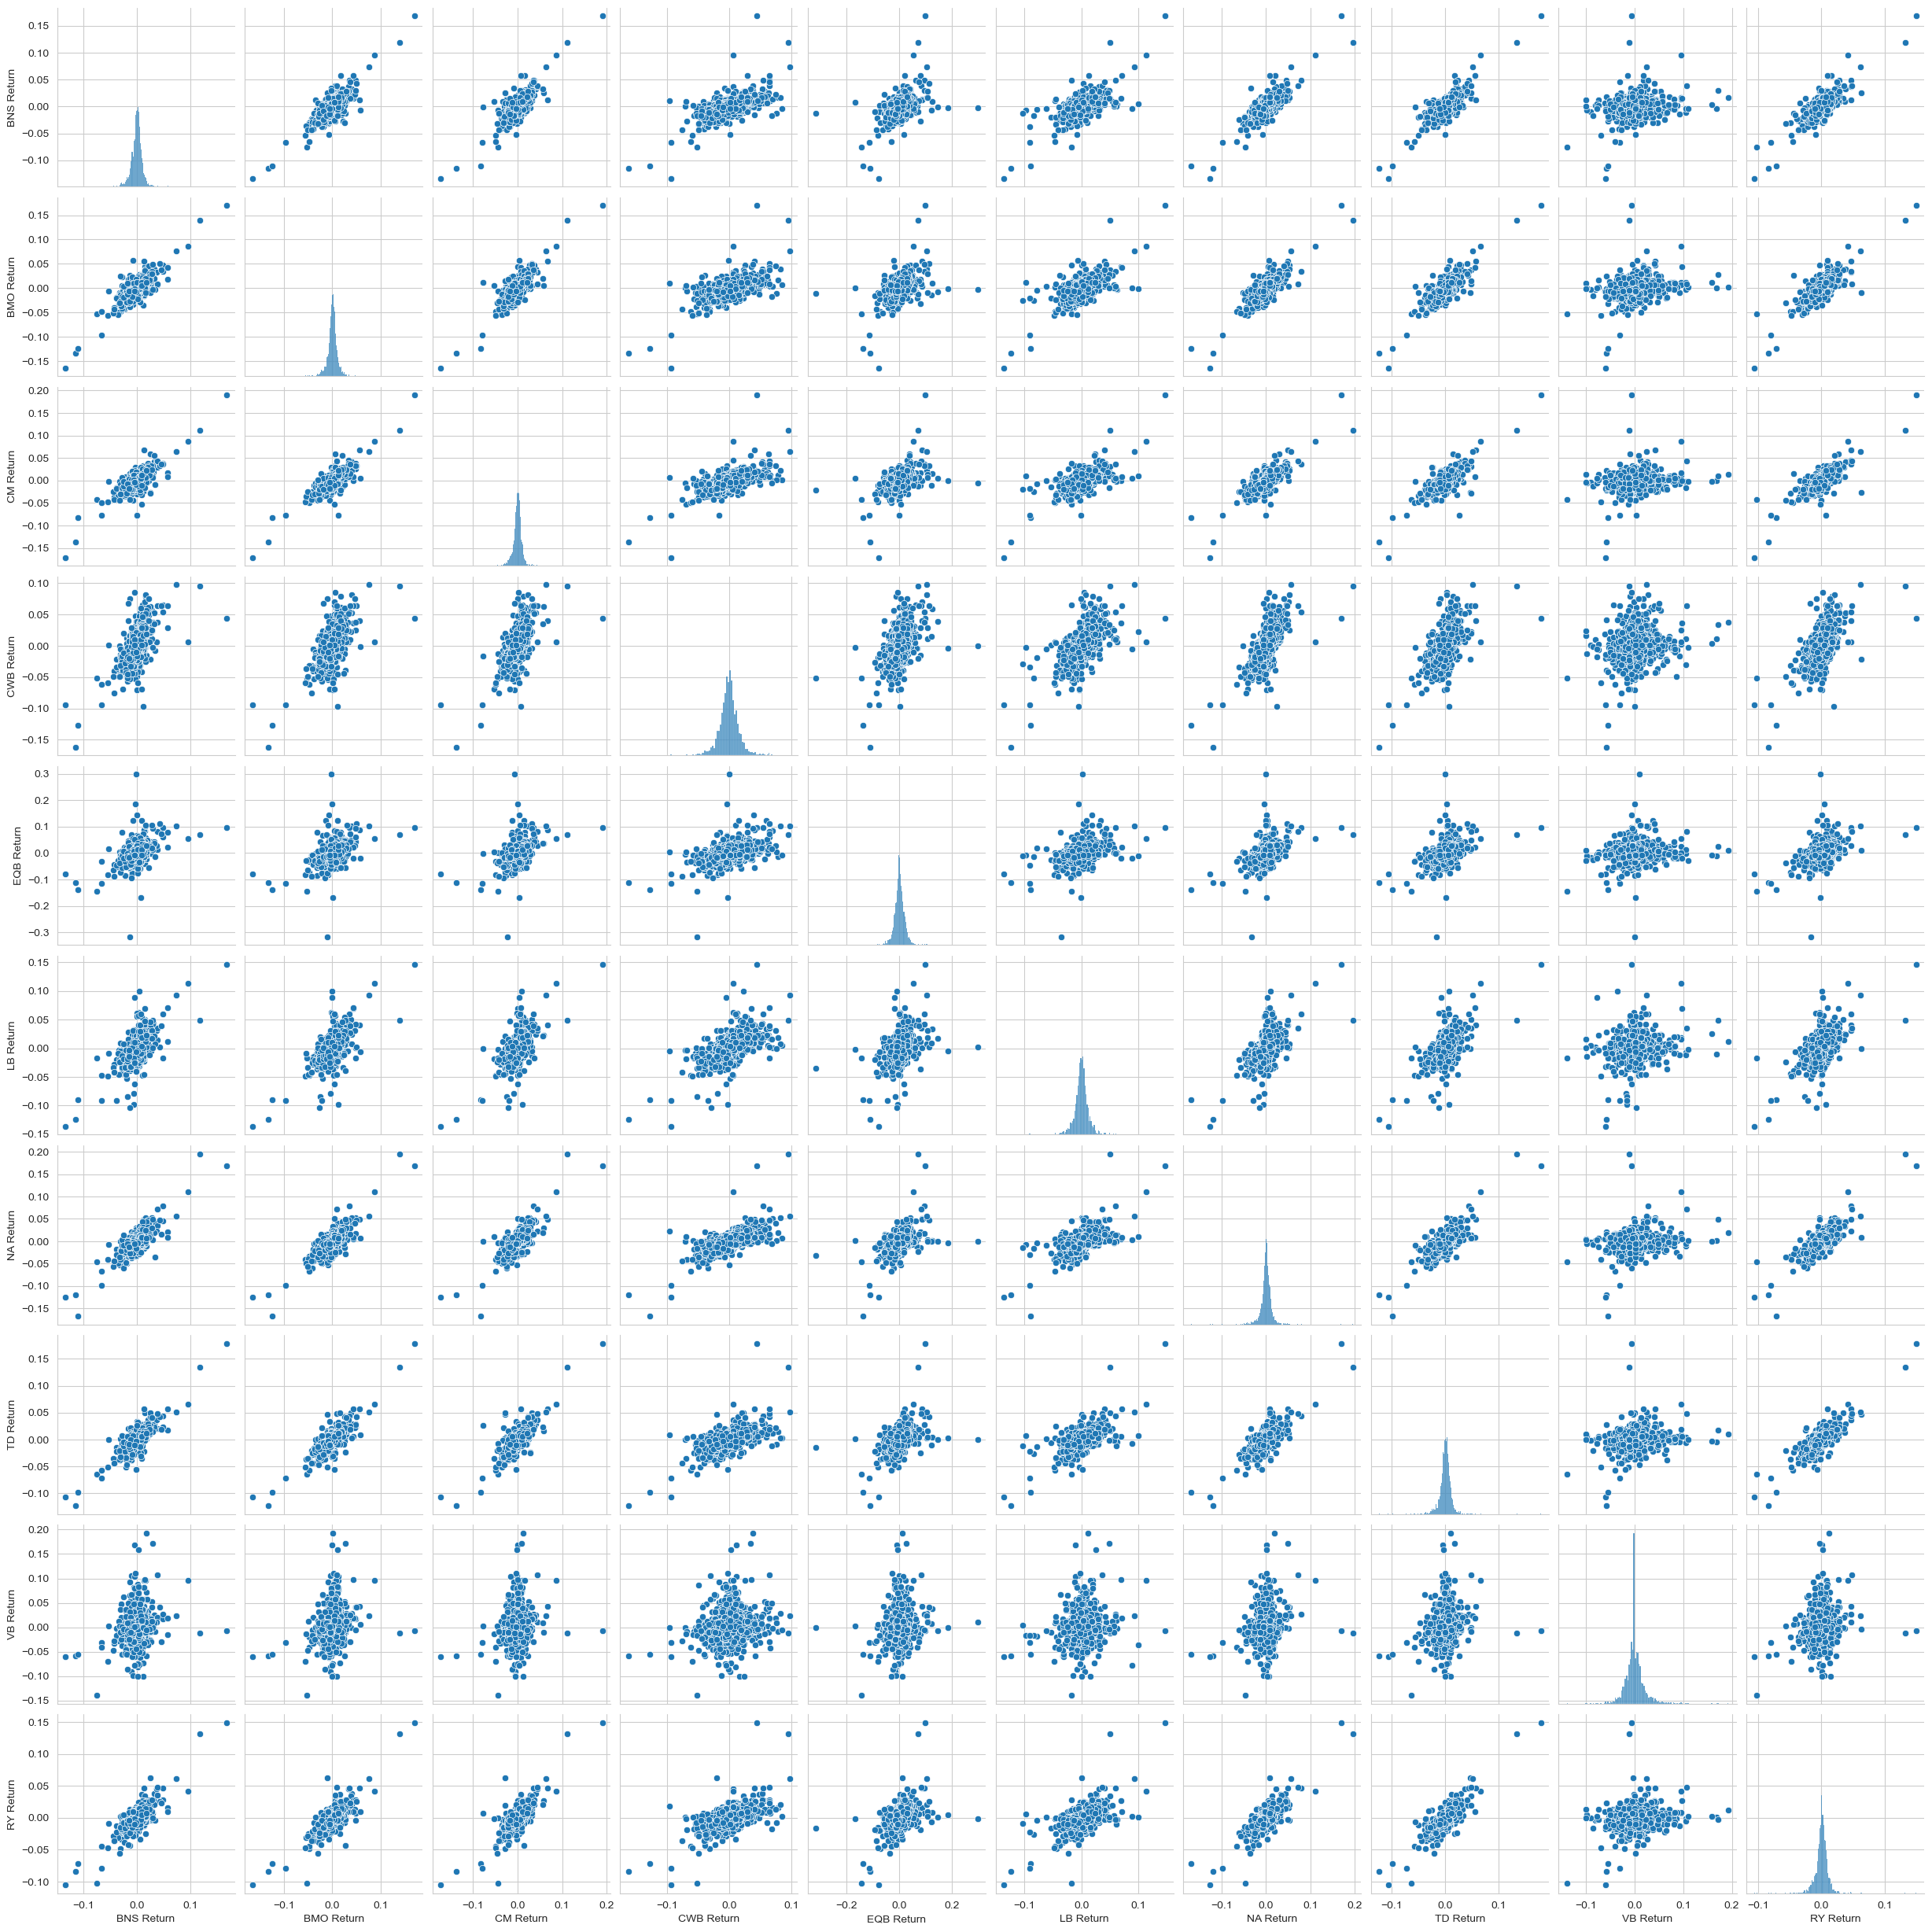

In [16]:
#Removing the first row because of the Null values, so starting at index 1

sns.pairplot(returns[1:])

<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

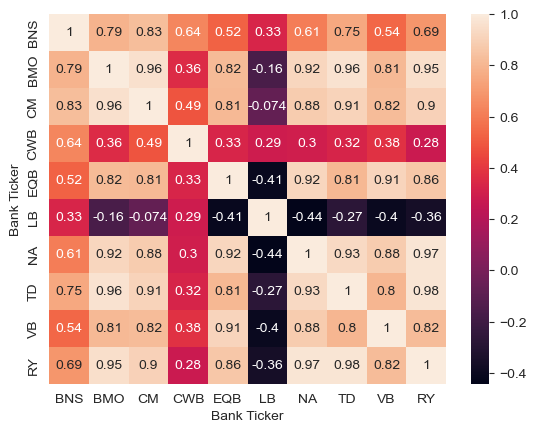

In [17]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [18]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

### Step 5: Indepth Analysis of a stock for 2020

In [19]:
RY20 = RY[['Open','High','Low','Close']]['2020-01-01':'2021-01-01']
RY20.iplot(kind='candle')

In [20]:
RY['Close']['2020-01-01':'2021-01-01'].ta_plot(study='sma',periods=[13,21,55])

In [21]:
RY['Close']['2020-01-01':'2021-01-01'].ta_plot(study='boll')